In [22]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

from utils.save_results import *
from utils.read_results import *
from utils.model_setup import *
from utils.dataset_setup import *
from utils.experiment_setup import *
from utils.metric_setup import *

In [23]:
path_to = "./data/"

In [24]:
"""
Setup Model
"""
model_name, model_code = choose_model()


ATENTION - Choose the model:
1 - gemini-1.5-flash
2 - llama-3.2-90b-text-preview
3 - other


Input the number you would like to execute:  1


Choosen Model: gemini-1.5-flash


In [25]:
"""
Setup Dataset
"""
dataset_name, dataset_code = setup_dataset()

ATENCAO - Escolha o dataset:
1 - essaysFullGrade
2 - aes_enem_dataset
3 - propor2024
4 - extended2024
5 - extended_complete
6 - Outro


Coloque o número do dataset que gostaria de executar:  2


Dataset escolhido: aes_enem_dataset


In [26]:
"""
Setup Metric
"""
metric_name = choose_metric()

ATENCAO - Escolha a metrica:
1 - QWK
2 - RMSE
3 - MAE
4 - other


Coloque o número do modelo que gostaria de executar:  1


In [31]:
means = []
stds = []
all_results = []
for j in range(1, 7):
  experiment_name, experiment_code = choose_experiment(j)
  comp = []
  results = []
  path_to_save = create_experiment_folder(path_to, model_name, experiment_name, dataset_name)

  for i in range(1, 6):
    id = str(i)
    
    filename_to_save = build_filename_to_save(model_name, experiment_name, dataset_name, id)
    dataset = read_csv(path_to_save, filename_to_save)
    print(id)
    print(experiment_code) 
    nota_original, nota_model = get_grades(dataset, model_name)
    print(nota_original)
    print(nota_model)

    if metric_name == QWK:
      metric_values = calculate_qwk(nota_original, nota_model)
    elif metric_name == RMSE:
      metric_values = calculate_rmse(nota_original, nota_model)
    elif metric_name == MAE:
        metric_values = calculate_mae(nota_original, nota_model)

    print(metric_values)
    results.append(metric_values)

  # Convert the list to a NumPy array
  np_matrix = np.array(results)

  # Calculate the mean along the columns (axis=0)
  column_means = np.mean(np_matrix, axis=0)
  means.append(column_means)

  # Calculate the standard deviation along the columns (axis=0)
  column_std = np.std(np_matrix, axis=0)
  stds.append(column_std)

  all_results.append(np_matrix)

Experimento escolhido: exp1
Folder './data/results/gemini-1.5-flash' already exists.
Folder './data/results/gemini-1.5-flash/exp1' already exists.
Folder './data/results/gemini-1.5-flash/exp1/aes_enem_dataset' already exists.
CSV with the answer will be saved in: aes_enem_dataset-gemini-1.5-flash-exp1-1
1
1
[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [200, 200, 200, 200, 200, 1000], [80, 40, 40, 0, 0, 160], [80, 80, 80, 120, 80, 440], [120, 120, 80, 160, 40, 520], [120, 120, 80, 120, 160, 600], [160, 160, 120, 160, 120, 720], [120, 80, 80, 80, 120, 480], [80, 120, 80, 80, 40, 400], [160, 160, 160, 120, 120, 720], [0, 0, 0, 0, 0, 0], [200, 160, 160, 200, 160, 880], [160, 200, 160, 200, 160, 880], [80, 40, 80, 80, 40, 320], [120, 120, 80, 80, 80, 480], [120, 120, 120, 120, 80, 560], [40, 80, 120, 160, 120, 520], [120, 120, 80, 120, 120, 560], [160, 120, 120, 80, 0, 480], [200, 200, 160, 200, 160, 920], [40, 40, 40, 40, 40, 200], [1

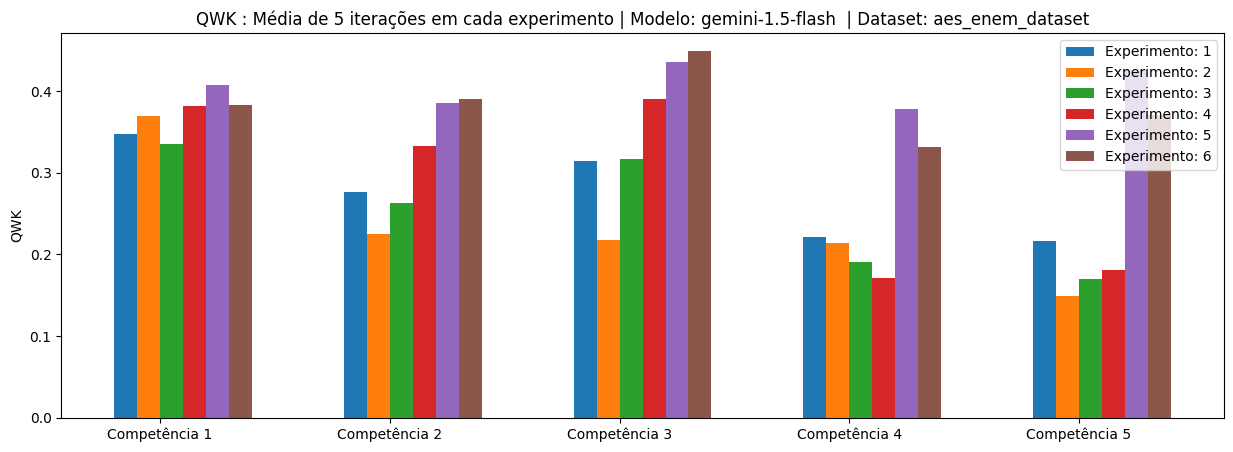

In [14]:
# Dados de exemplo
comp = list(range(1, 6))

# Configurações
fig, ax = plt.subplots(figsize=(15, 5))
bar_width = 0.10
x = np.arange(len(comp))

for i in range(len(means)):
    plt.bar(x + i * bar_width, means[i], width=bar_width, label=f"Experimento: {i+1}")

custom_labels = ["Competência 1", "Competência 2", "Competência 3", "Competência 4", "Competência 5"]
plt.xticks(x + bar_width * 1.5, custom_labels)

plt.ylabel(metric_name)
plt.title(f"{metric_name} : Média de 5 iterações em cada experimento | Modelo: {model_name}  | Dataset: {dataset_name}")

plt.legend()
plt.show()

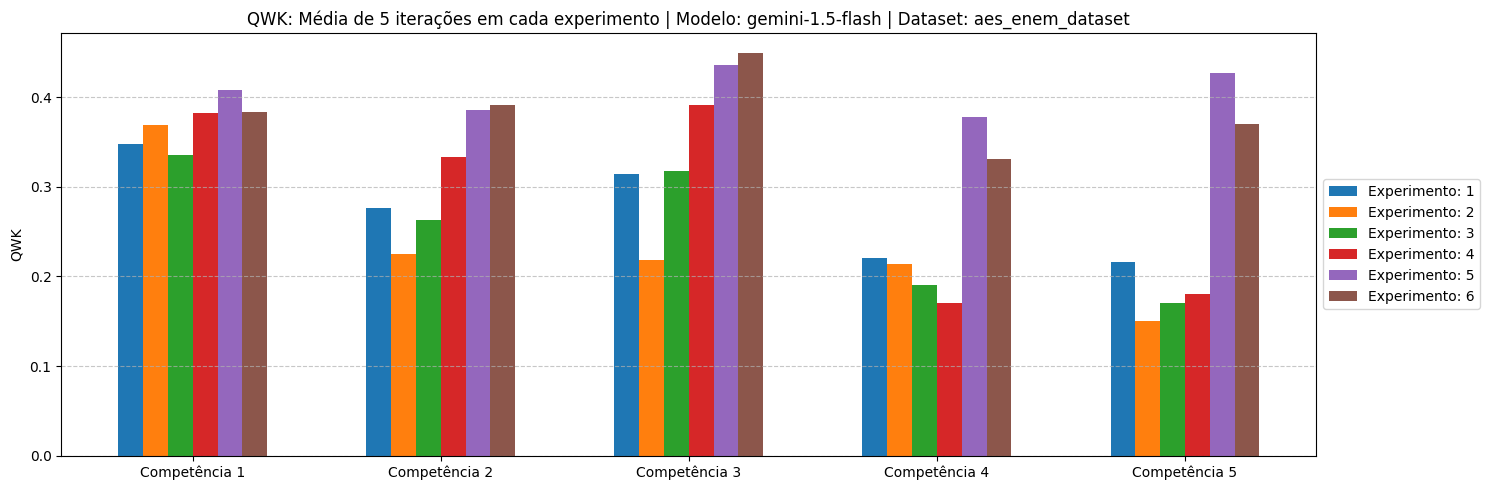

In [28]:
# Example Data
comp = list(range(1, 6))

# Plot Settings
fig, ax = plt.subplots(figsize=(15, 5))
bar_width = min(0.10, 1.0 / len(means))
x = np.arange(len(comp))

# Bar Plot for Each Experiment
for i in range(len(means)):
    plt.bar(x + i * bar_width, means[i], width=bar_width, label=f"Experimento: {i+1}")

# Custom Labels
custom_labels = ["Competência 1", "Competência 2", "Competência 3", "Competência 4", "Competência 5"]
if len(custom_labels) < len(comp):
    custom_labels.extend([f"Competência {i}" for i in range(len(custom_labels) + 1, len(comp) + 1)])

# X-Ticks Position and Labels
plt.xticks(x + (len(means) - 1) * bar_width / 2, custom_labels)

# Titles and Labels
plt.ylabel(metric_name or "Metric")
plt.title(f"{metric_name or 'Metric'}: Média de 5 iterações em cada experimento | Modelo: {model_name or 'Model'} | Dataset: {dataset_name or 'Dataset'}")

# Add Legend Outside the Plot
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust Layout to Fit the Legend
plt.tight_layout()

# Show Plot
plt.show()

In [20]:
results

[[np.float64(0.33588122886961636),
  np.float64(0.34542024732760424),
  np.float64(0.41557507987220443),
  np.float64(0.27485433357611067),
  np.float64(0.3693001823941634)],
 [np.float64(0.3914460285132383),
  np.float64(0.3725018782870022),
  np.float64(0.4302383316782523),
  np.float64(0.359839503921211),
  np.float64(0.3455202892728003)],
 [np.float64(0.40538628222703754),
  np.float64(0.4226360571520308),
  np.float64(0.4456084478712705),
  np.float64(0.33907297096053624),
  np.float64(0.35465289502433217)],
 [np.float64(0.4303061619945743),
  np.float64(0.40823836464733243),
  np.float64(0.4355783308931186),
  np.float64(0.31422351233671986),
  np.float64(0.37077769049489395)],
 [np.float64(0.35091904026939813),
  np.float64(0.4062494825216513),
  np.float64(0.5184426229508197),
  np.float64(0.36878498518274616),
  np.float64(0.4113873295910184)]]

IndexError: invalid index to scalar variable.

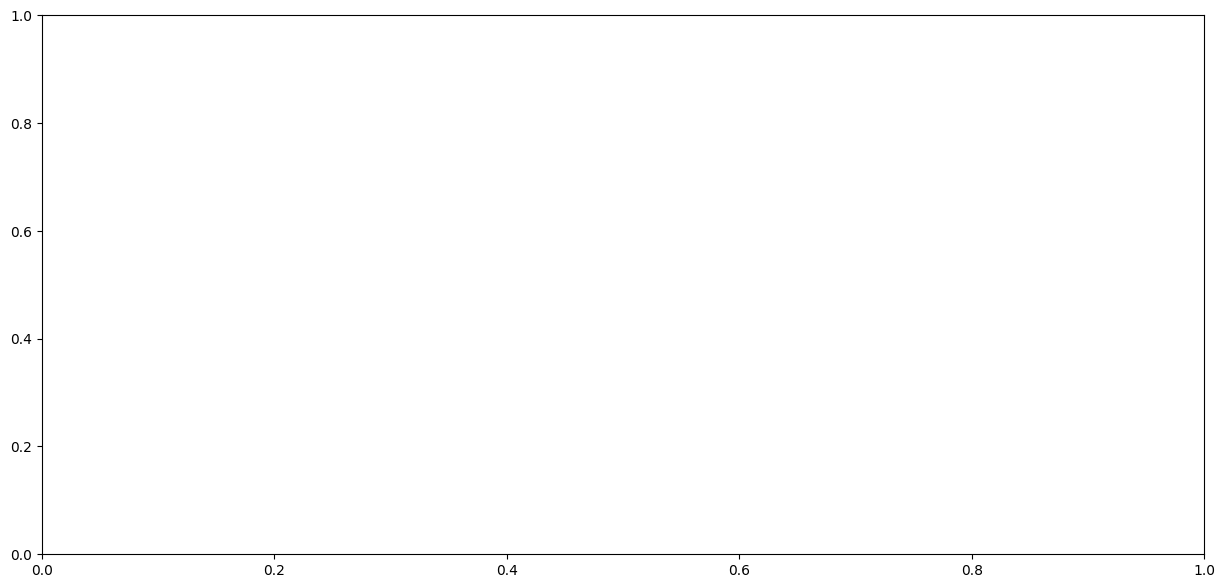

In [29]:
# Configurações do Boxplot
fig, ax = plt.subplots(figsize=(15, 7))

# Número de competências
num_competencias = len(results[0])  # Assumindo que cada `results[i]` tem métricas para todas as competências

# Configurar posições do eixo X para separar experimentos
positions = []
labels = []
for i in range(len(results)):
    positions.extend([j + i * (num_competencias + 1) for j in range(num_competencias)])
    labels.extend([f"Comp {j + 1} (Exp {i + 1})" for j in range(num_competencias)])

# Preparar os dados para o boxplot
data = []
for i in range(len(results)):  # Para cada experimento
    for j in range(num_competencias):  # Para cada competência
        data.append([result[j] for result in results[i]])  # Coletar os dados para competência j do experimento i

# Gerar o Boxplot
ax.boxplot(data, positions=positions, patch_artist=True)

# Adicionar rótulos e títulos
ax.set_xticks([pos + 0.5 * num_competencias for pos in range(0, len(positions), num_competencias)])
ax.set_xticklabels([f"Experimento {i + 1}" for i in range(len(results))], rotation=45)
ax.set_ylabel(metric_name or "Métrica")
ax.set_title(f"{metric_name or 'Métrica'}: Boxplot das competências para cada experimento | Modelo: {model_name} | Dataset: {dataset_name}")

# Ajustar layout e exibir o gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
all_results

[array([[0.32554741, 0.27429292, 0.38955073, 0.29351002, 0.21883914],
        [0.30905329, 0.28565627, 0.4496124 , 0.19933593, 0.23556261],
        [0.28312571, 0.21729194, 0.21866295, 0.1532796 , 0.22146229],
        [0.33020322, 0.28257871, 0.35788502, 0.28178675, 0.20572866],
        [0.48879552, 0.32228916, 0.15779587, 0.17699115, 0.20125294]]),
 array([[0.32017823, 0.16256911, 0.11419753, 0.13082347, 0.18846466],
        [0.32017823, 0.16256911, 0.11419753, 0.13082347, 0.18846466],
        [0.32017823, 0.16256911, 0.11419753, 0.13082347, 0.18846466],
        [0.42196942, 0.30251043, 0.30824117, 0.35585894, 0.1698075 ],
        [0.46332419, 0.33475783, 0.4400987 , 0.31967517, 0.01339512]]),
 array([[0.33061224, 0.17907741, 0.20072383, 0.22551161, 0.11774842],
        [0.33061224, 0.17907741, 0.20072383, 0.23212435, 0.11774842],
        [0.40385218, 0.49079097, 0.42488789, 0.20328901, 0.26277215],
        [0.2865193 , 0.24052817, 0.34614919, 0.15339867, 0.17825341],
        [0.32324

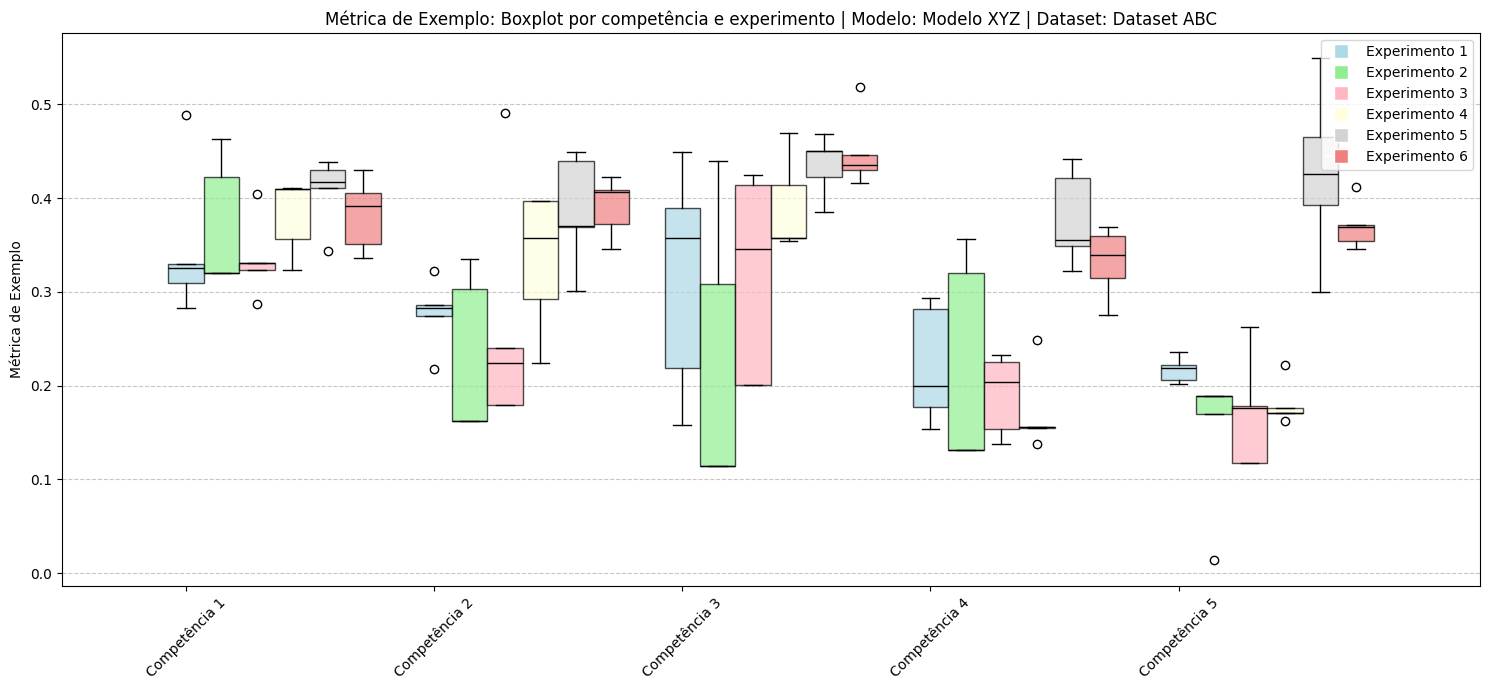

In [34]:
# Número de competências e experimentos
num_competencias = results[0].shape[1]
num_experimentos = len(results)

# Organizar dados e posições para o Boxplot
data = []
positions = []
group_width = 1.0
box_width = group_width / (num_experimentos + 1)  # Ajusta espaçamento

for competencia_idx in range(num_competencias):
    start_pos = competencia_idx * group_width + 1  # Define a posição inicial do grupo
    for exp_idx in range(num_experimentos):
        data.append(results[exp_idx][:, competencia_idx])  # Dados do experimento para a competência
        positions.append(start_pos + exp_idx * box_width)  # Define posição do boxplot

# Gerar Boxplots
fig, ax = plt.subplots(figsize=(15, 7))
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightgray', 'lightcoral']  # 6 cores
for i in range(num_experimentos):
    exp_positions = positions[i::num_experimentos]  # Posições deste experimento
    ax.boxplot(
        data[i::num_experimentos],  # Dados deste experimento
        positions=exp_positions,
        widths=box_width,
        patch_artist=True,
        boxprops=dict(facecolor=colors[i], alpha=0.7),
        medianprops=dict(color='black')
    )

# Configurar rótulos e título
custom_labels = [f"Competência {i + 1}" for i in range(num_competencias)]
ax.set_xticks([i * group_width + 1 for i in range(num_competencias)])
ax.set_xticklabels(custom_labels, rotation=45)

metric_name = "Métrica de Exemplo"
model_name = "Modelo XYZ"
dataset_name = "Dataset ABC"

ax.set_ylabel(metric_name)
ax.set_title(f"{metric_name}: Boxplot por competência e experimento | Modelo: {model_name} | Dataset: {dataset_name}")

# Adicionar legenda para os experimentos
handles = [plt.Line2D([0], [0], color='w', markerfacecolor=colors[i], marker='s', markersize=10)
           for i in range(num_experimentos)]
ax.legend(handles, [f"Experimento {i + 1}" for i in range(num_experimentos)], loc="upper right")

# Ajustar layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

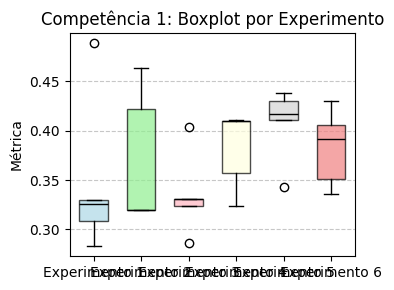

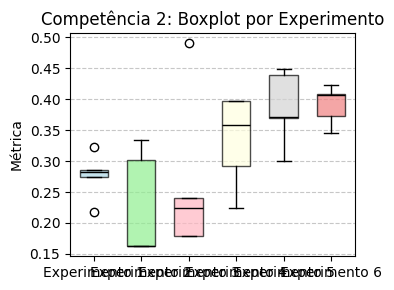

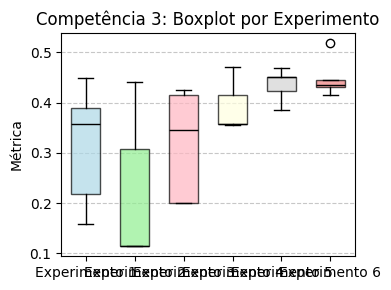

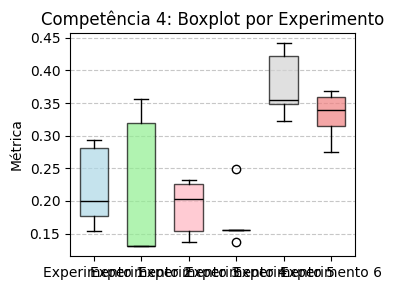

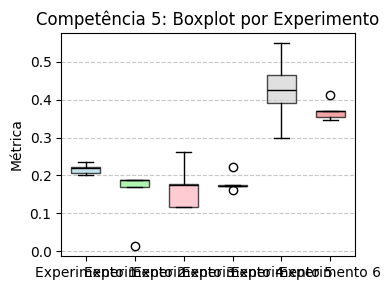

In [36]:
# Configurar cores
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightgray', 'lightcoral']  # 6 cores

# Criar gráficos separados para cada competência
num_competencias = results[0].shape[1]
num_experimentos = len(results)

for competencia_idx in range(num_competencias):
    # Organizar dados para a competência atual
    data = [results[exp_idx][:, competencia_idx] for exp_idx in range(num_experimentos)]
    positions = range(1, num_experimentos + 1)

    # Criar gráfico para a competência
    fig, ax = plt.subplots(figsize=(4, 3))
    for i in range(num_experimentos):
        ax.boxplot(
            [data[i]],  # Dados do experimento para esta competência
            positions=[positions[i]],
            widths=0.6,
            patch_artist=True,
            boxprops=dict(facecolor=colors[i], alpha=0.7),
            medianprops=dict(color='black')
        )

    # Configurar título e rótulos
    ax.set_xticks(positions)
    ax.set_xticklabels([f"Experimento {i + 1}" for i in range(num_experimentos)])
    ax.set_ylabel("Métrica")
    ax.set_title(f"Competência {competencia_idx + 1}: Boxplot por Experimento")

    # Ajustar layout
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

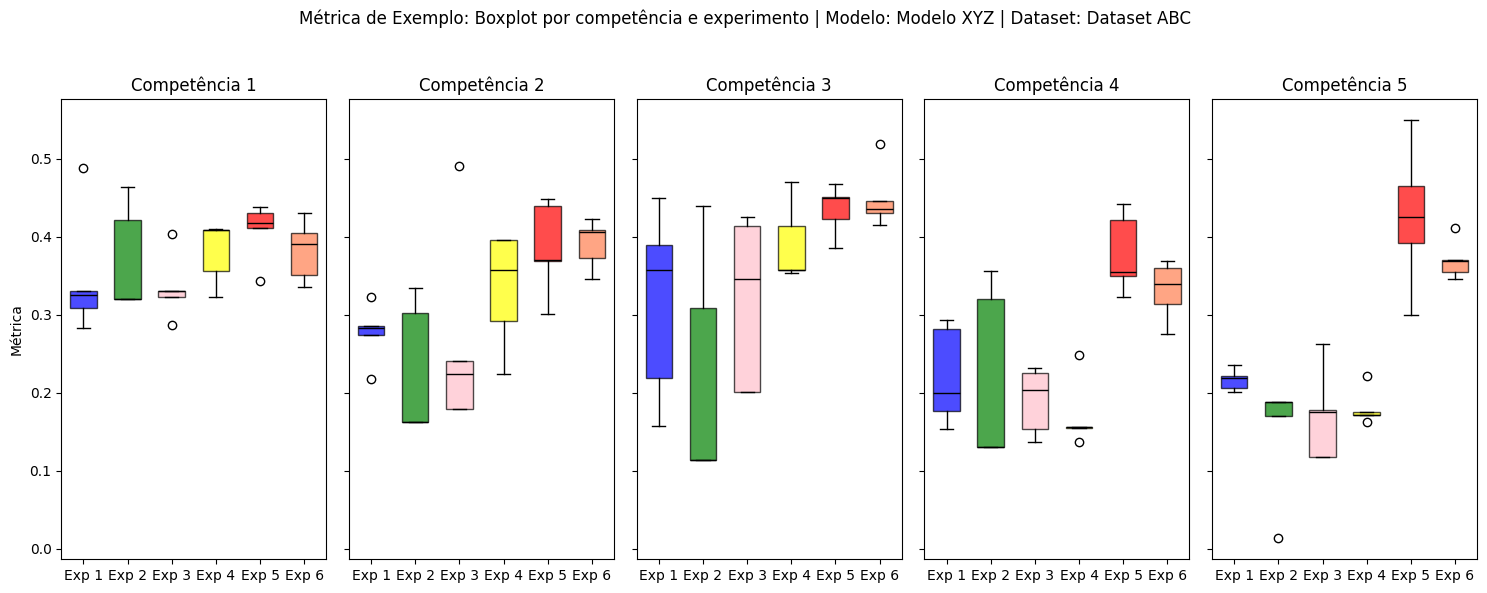

In [52]:
# Configurar cores
colors = ['blue', 'green', 'pink', 'yellow', 'red', 'coral']  # 6 cores

# Criar layout com 5 gráficos lado a lado
num_competencias = results[0].shape[1]
num_experimentos = len(results)

fig, axes = plt.subplots(1, num_competencias, figsize=(15, 6), sharey=True)

for competencia_idx in range(num_competencias):
    # Organizar dados para a competência atual
    data = [results[exp_idx][:, competencia_idx] for exp_idx in range(num_experimentos)]
    positions = range(1, num_experimentos + 1)

    # Criar gráfico para a competência
    for i in range(num_experimentos):
        axes[competencia_idx].boxplot(
            [data[i]],  # Dados do experimento para esta competência
            positions=[positions[i]],
            widths=0.6,
            patch_artist=True,
            boxprops=dict(facecolor=colors[i], alpha=0.7),
            medianprops=dict(color='black')
        )

    # Configurar título e rótulos
    axes[competencia_idx].set_xticks(positions)
    axes[competencia_idx].set_xticklabels([f"Exp {i + 1}" for i in range(num_experimentos)])
    axes[competencia_idx].set_title(f"Competência {competencia_idx + 1}")

# Configurar o eixo Y e a legenda
axes[0].set_ylabel("Métrica")
handles = [plt.Line2D([0], [0], color='w', markerfacecolor=colors[i], marker='s', markersize=10)
           for i in range(num_experimentos)]

# Adicionar título geral
fig.suptitle(f"{metric_name}: Boxplot por competência e experimento | Modelo: {model_name} | Dataset: {dataset_name}")

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deixa espaço para a legenda
plt.show()

In [49]:
fig.savefig("./boxplot_experiments.jpg", dpi=300, bbox_inches="tight")


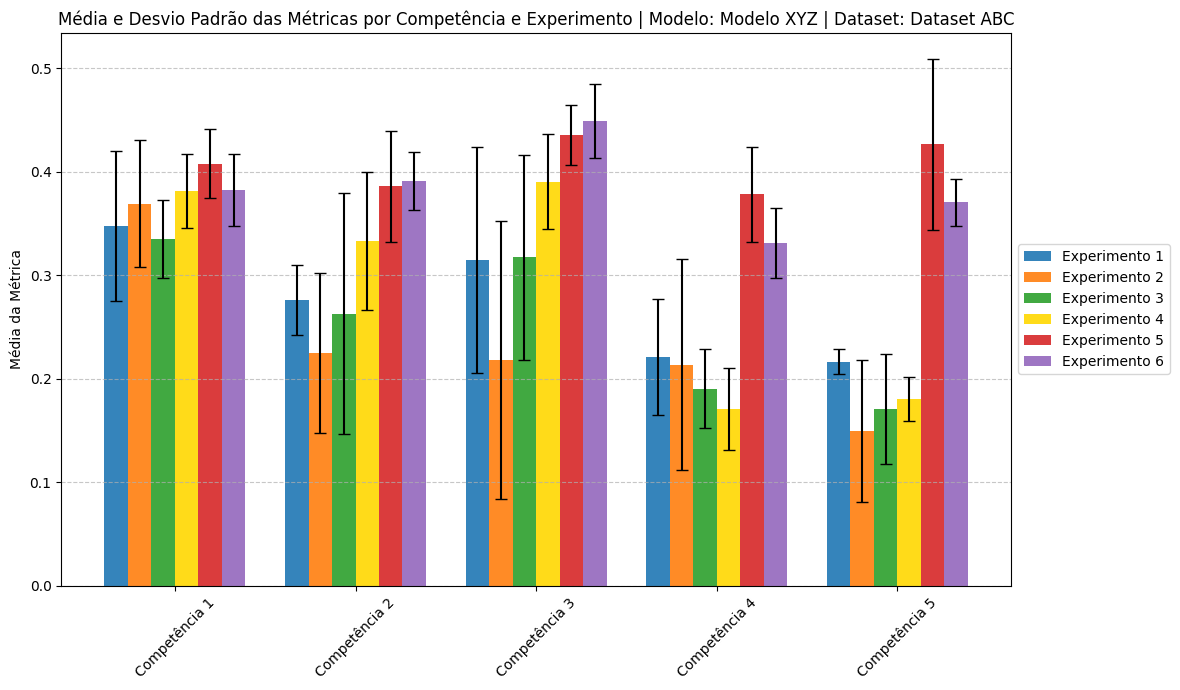

In [60]:
# Configurações
bar_width = 0.13
x = np.arange(len(means[0]))  # Posições no eixo X
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#FFD700", "#d62728", "#9467bd"]  # Strong, harmonious colors


# Criar o gráfico de barras com barras de erro
fig, ax = plt.subplots(figsize=(14, 7))

for i, (mean, std) in enumerate(zip(means, stds)):
    ax.bar(
        x + i * bar_width,
        mean,
        yerr=std,  # Adiciona o desvio padrão como barra de erro
        width=bar_width,
        label=f"Experimento {i + 1}",
        color=colors[i % len(colors)],
        capsize=4,  # Tamanho das extremidades das barras de erro
        alpha=0.9,  # Transparência para tons suaves
    )

# Adicionar rótulos e títulos
custom_labels = [f"Competência {i + 1}" for i in range(len(means[0]))]
ax.set_xticks(x + bar_width * (len(means) - 1) / 2)
ax.set_xticklabels(custom_labels, rotation=45)
ax.set_ylabel("Média da Métrica")
ax.set_title(
    "Média e Desvio Padrão das Métricas por Competência e Experimento | Modelo: Modelo XYZ | Dataset: Dataset ABC"
)

# Ajustar a posição da legenda
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Ajustar layout
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajusta o espaço para a legenda fora do gráfico
plt.show()